## Regression Project - Uber/Life Prices

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing in the dataset
cab = pd.read_csv('Data/cab.csv')

#Cleaning out the df
df = cab.drop(columns = ['id', 'product_id', 'source'])

#Shuffling df
df = df.sample(frac=1).reset_index(drop=True)

#Splitting df and strictly selecting 20000 rows
df = df.iloc[0: 20000]
df = df.dropna()
df = df.reset_index()

In [3]:
#Establishing the categorical variables into quantitative values
one_hot = pd.get_dummies(df['destination'])
df = df.drop('destination', axis = 1)

one_hot2 = pd.get_dummies(df['name'])
df = df.drop('name', axis = 1)

one_hot3 = pd.get_dummies(df['cab_type'])
df = df.drop('cab_type', axis = 1)

one_hot = one_hot.join(one_hot2)
one_hot.rename(columns = {'Lyft': 'Lyft_Standard'}, inplace = True)
one_hot = one_hot.join(one_hot3)

In [4]:
#Determining Coorelation
df.corr()['price'].sort_values(ascending=False)

price               1.000000
distance            0.342301
surge_multiplier    0.233743
index               0.003676
time_stamp         -0.001441
Name: price, dtype: float64

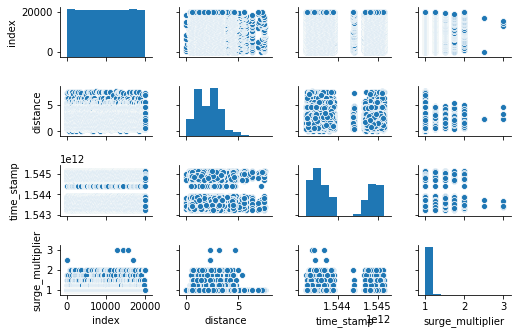

In [5]:
#Producing a sns
sns.pairplot(df.drop('price', axis = 1), height = 1.2, aspect=1.5)

In [6]:
#Response Variable
y = df['price']

#Numerical Values
df = df.drop(columns = ['price', 'index'])

[87.6066526970105, 72.25420135132818, 72.25410389918322, 72.25401241949515, 72.25392691648901, 72.25384739437061, 72.25377385732638, 72.25370630952334, 72.25364475510916, 72.25358919821194, 72.25353964294032, 72.25349609338333, 72.25345855361044, 72.2534270276714, 72.25340151959628, 72.25338203339544, 72.25336857305938] [84.68316234526262, 71.5416011096819, 71.54041595616009, 71.53923588627556, 71.53806078706354, 71.5368906634688, 71.53572552052748, 71.53456536281996, 71.53341019557345, 71.53226002355716, 71.53111485163456, 71.52997468465341, 71.52883952744527, 71.52770938482551, 71.52658426159348, 71.52546416253229, 71.52434909240867]


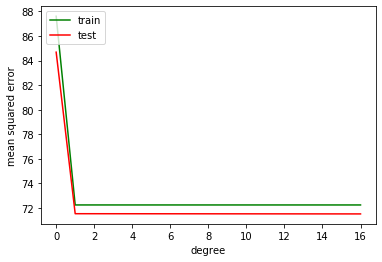

In [7]:
#Determining what transformation to do to the X variables
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,random_state = 99)

mindegree = 0
maxdegree = 17

train_error = []
test_error = []

for deg in range(mindegree, maxdegree):
    model = make_pipeline(PolynomialFeatures(deg),LinearRegression())
    model.fit(X_train,y_train)
    train_error.append(mean_squared_error(y_train,model.predict(X_train)))
    test_error.append(mean_squared_error(y_test,model.predict(X_test)))

print(train_error,test_error)
plt.plot(np.arange(mindegree,maxdegree), train_error, color='green', label='train')
plt.plot(np.arange(mindegree,maxdegree), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [8]:
# Applying Standard Scaler to numerical values
model = make_pipeline(PolynomialFeatures(1), StandardScaler())
model.fit(df)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [9]:
#Joining the onehots into the og dataset
x = one_hot.join(pd.DataFrame(model.transform(df)))

In [10]:
#Applying a regression to the data without testing or training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 99)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9298856402982575


In [11]:
model.predict([x.iloc[0]])

array([13.15136719])

In [12]:
print(model.coef_)
print(model.intercept_)

[-6.47749135e+12 -6.47749135e+12 -6.47749135e+12 -6.47749135e+12
 -6.47749135e+12 -6.47749135e+12 -6.47749135e+12 -6.47749135e+12
 -6.47749135e+12 -6.47749135e+12 -6.47749135e+12 -6.47749135e+12
  2.97507493e+12  2.97507493e+12 -1.74794775e+12 -1.74794775e+12
 -1.74794775e+12 -1.74794775e+12 -1.74794775e+12 -1.74794775e+12
  2.97507493e+12  2.97507493e+12  2.97507493e+12  2.97507493e+12
  2.85800078e+12 -1.86502191e+12 -4.88281250e-04  3.23359651e+00
 -1.48310296e-02  1.78974736e+00]
5367438333247.145


In [17]:
#Applying ridge regression model
model1 = RidgeCV(alphas=[0.0001, 0.1, 1, 10], store_cv_values= True)
model1.fit(x, y)

print('R2:', model1.score(x, y))
print('alpha: ', model1.alpha_)
print(f'MSE corresponding to best alpha {model.alpha_}: {np.maen(model.cv_values_, azis = 0)})

model1.predict([x.iloc[0]])

R2: 0.9283469618494002
alpha:  0.1


array([13.20205339])

In [15]:
print(model1.coef_)
print(model1.intercept_)

[ 2.86698349e-02 -3.39974674e-01 -3.88930208e-02 -3.46710566e-01
  4.73802787e-01  7.47659063e-02  4.42777904e-03  2.18793755e-01
  5.80384361e-02 -1.53557863e-01  1.27674598e-01 -1.07036819e-01
  4.72332862e+00  1.44498065e+01  3.15158111e-01  5.58068505e+00
  1.49121053e+01 -7.71750229e+00 -2.06615678e+00 -1.06101131e+01
 -7.16998210e+00 -6.14996641e+00 -1.95521710e-01 -6.07184044e+00
  4.14175054e-01 -4.14175054e-01  0.00000000e+00  3.20367789e+00
  2.79146238e-03  1.75030470e+00]
16.558414879723955
